In [1]:
!pip install -Uqq fastbook

In [2]:
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [3]:
from fastbook import *
from fastai.vision.all import *

In [4]:
path = '/content/gdrive/MyDrive/images/'

In [5]:
import torch
from torchvision import datasets, transforms
train_size = 200
transforms = transforms.Compose([transforms.Resize([train_size, train_size]), transforms.ToTensor()])

dataset=datasets.ImageFolder(path,transform=transforms)

In [6]:
dataloader = torch.utils.data.DataLoader(dataset,batch_size=32,shuffle=True)  
# PyTorch's Dataloader can split data to batches and shuffles them to get different batches for each epoch.
# Choosing batch_size as power of 2 will make computation efficient because of computers' architecture.

In [7]:
model = nn.Sequential(nn.Linear(train_size*train_size*3 ,train_size*10),
                      nn.ReLU(),
                      nn.Linear(train_size*10,train_size),
                      nn.ReLU(),
                      nn.Linear(train_size, 30),
                      nn.ReLU(),
                      nn.Linear(30, 3),
                      nn.Softmax())

loss_func=nn.CrossEntropyLoss()
optimizer=SGD(model.parameters(),lr=0.01)     

# I have tried different learning rates like 0.001, 0.005, 0.05, 0.07 0.1 and I find the appropriate one is 0.01
# I have used CrossEntropyLoss as a loss function because I built multi-class classifier.


In [8]:
valid_path = "/content/gdrive/MyDrive/valid/"
valid_data = datasets.ImageFolder(valid_path,transform=transforms)

In [9]:
valid_images = torch.stack([tensor(data[0]) for data in valid_data])
valid_labels = tensor([data[1] for data in valid_data])

# I used only dataset function (from PyTorch) and stack images and labels of validation set to prepare them for training part

In [10]:
# This accuracy function gives us validation accuracy for visualizing in training part.
# If the softmax output of target label is higher than 0.7 (70% correct predicted) it count that as a correct prediction and returns how our model predict over all validation set.

def accuracy_func(valid_predictions, valid_labels):     
  count = 0
  for i in range(len(valid_labels)):
    if valid_predictions[i][valid_labels[i]] > 0.7:
      count += 1
  return count/len(valid_labels)

In [11]:
num_epochs = 100

for e in range(num_epochs):
  epoch_loss = 0
  for images, labels in iter(dataloader):
    optimizer.zero_grad()

    predictions = model.forward(images.view(-1, train_size*train_size*3))   
    loss = loss_func(predictions, labels)
    loss.backward() 
    optimizer.step()
    
    epoch_loss += loss
  valid_predictions = model.forward(valid_images.view(-1, train_size*train_size*3))
  valid_loss = loss_func(valid_predictions, valid_labels)
  valid_accuracy = accuracy_func(valid_predictions, valid_labels)
  print("Epoch Number : {}    Train Loss : {}    Validation Loss : {}    Accuracy : {:.2f}".format(e+1, epoch_loss, valid_loss, valid_accuracy))  

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Epoch Number : 1    Train Loss : 16.382080078125    Validation Loss : 1.0979716777801514    Accuracy : 0.00
Epoch Number : 2    Train Loss : 16.22357749938965    Validation Loss : 1.09242844581604    Accuracy : 0.00
Epoch Number : 3    Train Loss : 16.096935272216797    Validation Loss : 1.0883421897888184    Accuracy : 0.00
Epoch Number : 4    Train Loss : 16.001502990722656    Validation Loss : 1.0823872089385986    Accuracy : 0.00
Epoch Number : 5    Train Loss : 15.48186206817627    Validation Loss : 1.1115056276321411    Accuracy : 0.00
Epoch Number : 6    Train Loss : 15.534997940063477    Validation Loss : 1.0635920763015747    Accuracy : 0.00
Epoch Number : 7    Train Loss : 15.303023338317871    Validation Loss : 1.0586477518081665    Accuracy : 0.00
Epoch Number : 8    Train Loss : 14.78515911102295    Validation Loss : 1.043380618095398    Accuracy : 0.03
Epoch Number : 9    Train Loss : 14.806703567504883    Validation Loss : 1.050204873085022    Accuracy : 0.00
Epoch Numbe

# Compared to Pretrained Model's Outputs (From Step1)
Using ResNet18 architecture and pretrained weights, 4 epochs are enough to get good result (low error rate)

But in the situation that building our shallow and linear model (not containing convolution), not gives us accurate predictions with 100 epochs.

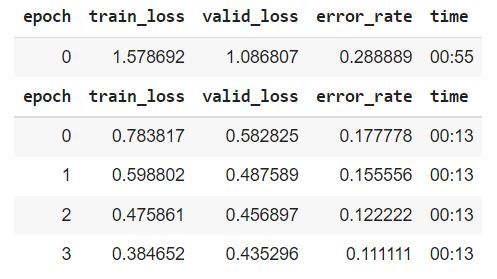